In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Import

In [2]:
df = pd.read_csv(r'C:\Users\Hp\Downloads\Practice Data frames\Database\SeoulBikeData.csv', encoding="unicode_escape", parse_dates=['Date'])

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
dfn = df.copy()

## Data Inspection

In [5]:
df.Date = df.Date.apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))

In [6]:
df.Date[0].year

2017

In [7]:
df.shape

(8760, 14)

In [8]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [10]:
df.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746


In [83]:
df.describe().columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [145]:
# List of Numerical And Categorical Columns

num = set([ 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']) 

#deleted Data column since it is a time series data
#also the hour feature since it belongs to categorical data

cat = set(df.columns) - num
print(num, '\n\n', cat)


{'Wind speed (m/s)', 'Temperature(°C)', 'Dew point temperature(°C)', 'Humidity(%)', 'Rented Bike Count', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Visibility (10m)'} 

 {'Hour', 'Holiday', 'Seasons', 'Functioning Day', 'Date'}


## Numerical Data Distribution

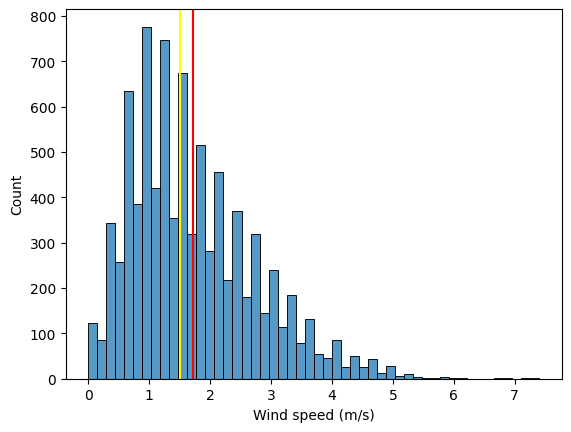

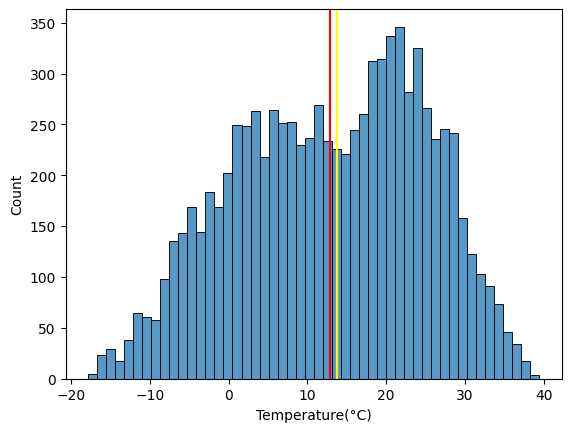

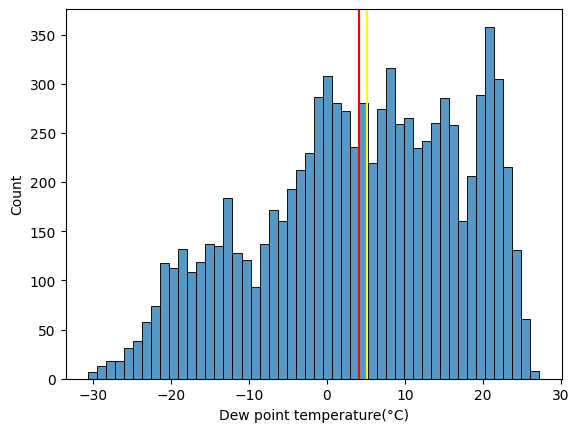

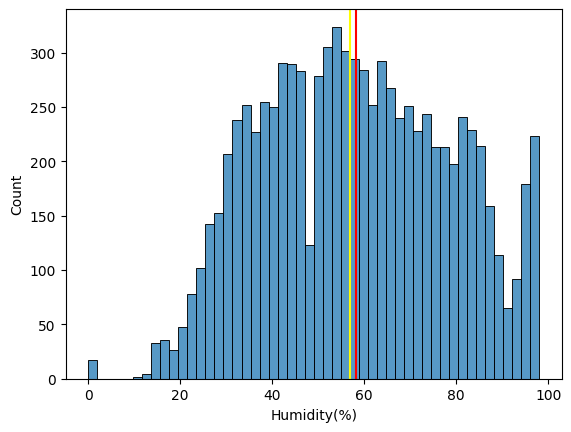

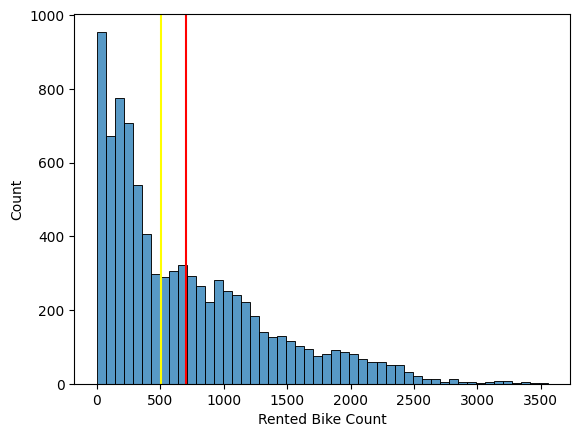

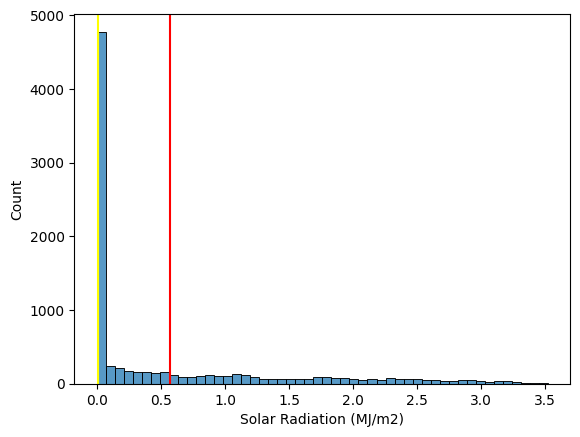

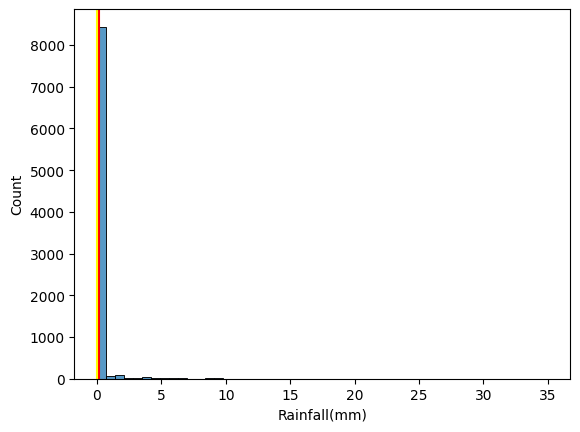

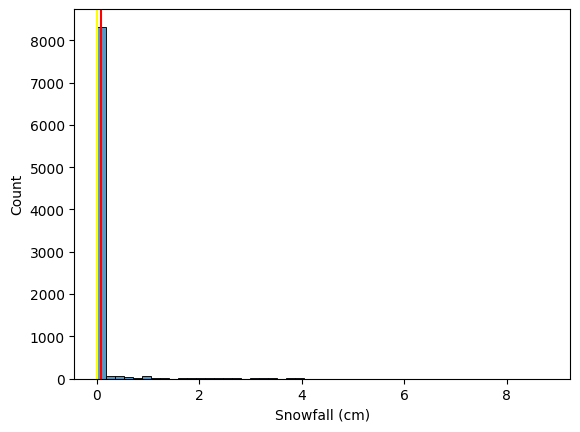

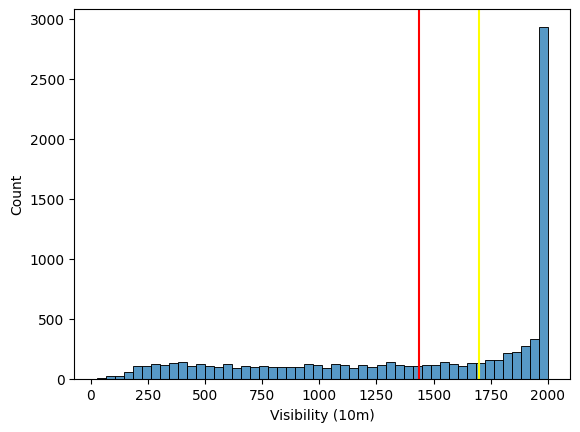

In [96]:
for i in list(num):
    sns.histplot(x = df[f'{i}'], bins = 50)
    plt.axvline(np.mean(df[f'{i}']), color = 'red')
    plt.axvline(np.median(df[f'{i}']), color = 'yellow')
    plt.show()

## Wind Speed sqrt Transformation 

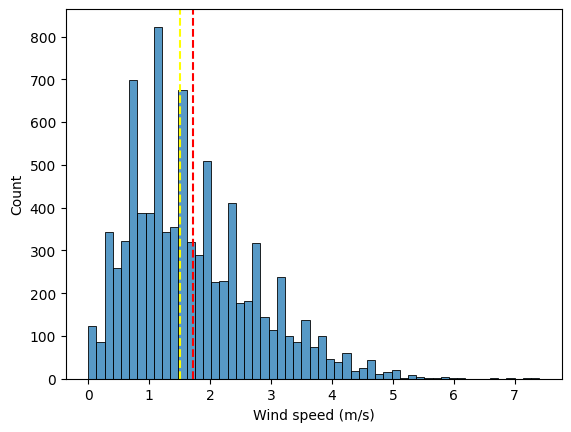

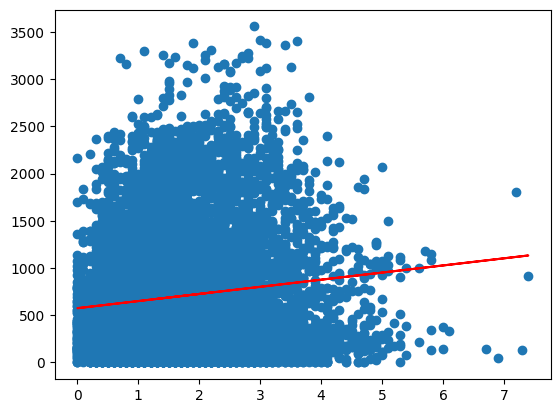

In [143]:
sns.histplot(df['Wind speed (m/s)'])
plt.axvline(np.mean(df['Wind speed (m/s)']), color = 'red', linestyle = 'dashed')
plt.axvline(np.median(df['Wind speed (m/s)']), color = 'yellow', linestyle = 'dashed')
plt.show()


coeff = np.polyfit((df['Wind speed (m/s)']), df['Rented Bike Count'], 1)
fun = np.poly1d(coeff)
plt.scatter((df['Wind speed (m/s)']), df['Rented Bike Count'])
plt.plot((df['Wind speed (m/s)']), fun((df['Wind speed (m/s)'])), color = 'red')

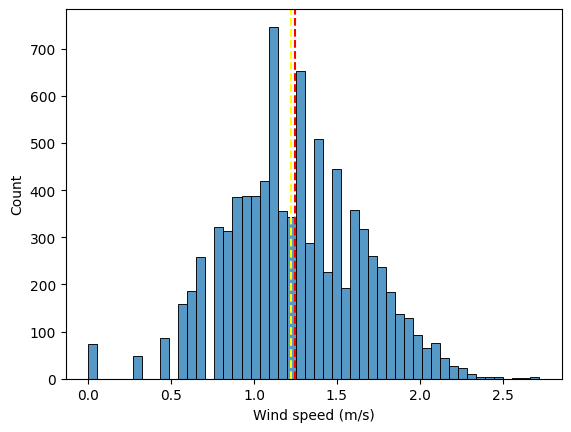

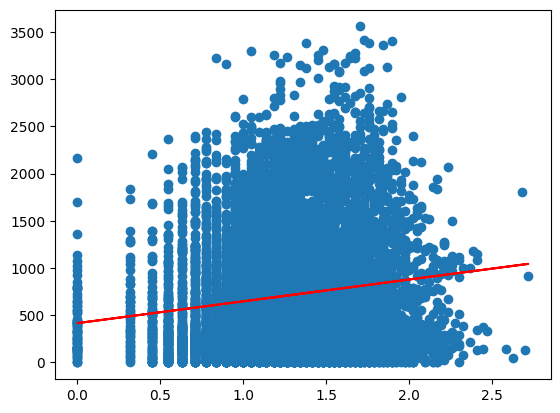

In [144]:
sns.histplot(np.sqrt(df['Wind speed (m/s)']))
plt.axvline(np.mean(np.sqrt(df['Wind speed (m/s)'])), color = 'red', linestyle = 'dashed')
plt.axvline(np.median(np.sqrt(df['Wind speed (m/s)'])), color = 'yellow', linestyle = 'dashed')
plt.show()

coeff = np.polyfit(np.sqrt(df['Wind speed (m/s)']), df['Rented Bike Count'], 1)
fun = np.poly1d(coeff)
plt.scatter(np.sqrt(df['Wind speed (m/s)']), df['Rented Bike Count'])
plt.plot(np.sqrt(df['Wind speed (m/s)']), fun(np.sqrt(df['Wind speed (m/s)'])), color = 'red')

C:\Users\Hp\anaconda3\envs\MrRaut\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Hp\anaconda3\envs\MrRaut\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


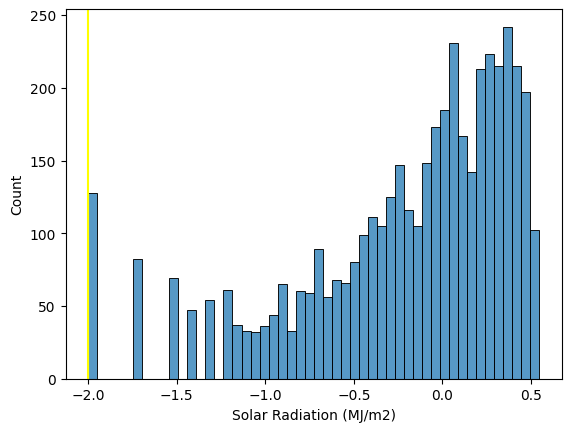

C:\Users\Hp\anaconda3\envs\MrRaut\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


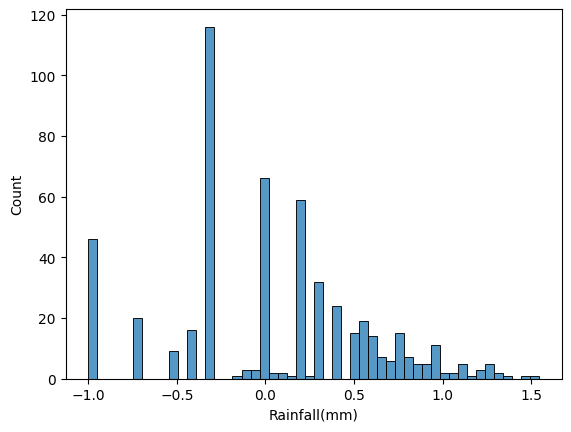

C:\Users\Hp\anaconda3\envs\MrRaut\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


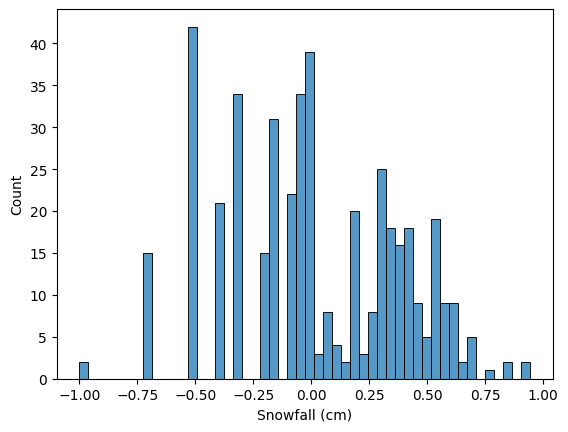

In [154]:
# using log10 or inverse transformation on highly sqewed data

hk = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for i in list(hk):
    sns.histplot(x = np.log10(df[f'{i}']), bins = 50)
    plt.axvline(np.mean(np.log10(df[f'{i}'])), color = 'red')
    plt.axvline(np.median(np.log10(df[f'{i}'])), color = 'yellow')
    plt.show()

## Using max(x+1)-x for negative skewed Visibility data

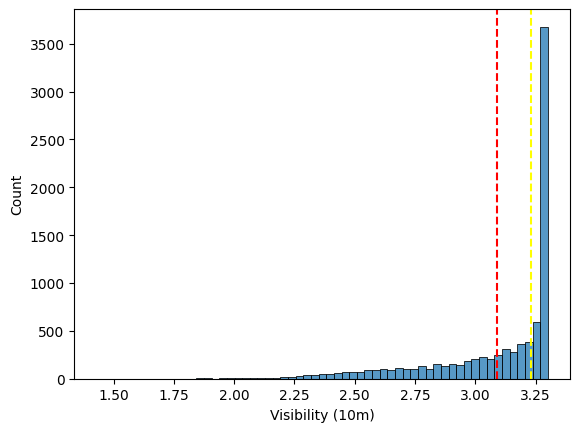

In [117]:
sns.histplot(np.sqrt(np.max(df['Visibility (10m)']+1)-df['Visibility (10m)']))
plt.axvline(np.mean(np.log10(df['Visibility (10m)'])), color = 'red', linestyle = 'dashed')
plt.axvline(np.median(np.log10(df['Visibility (10m)'])), color = 'yellow', linestyle = 'dashed')

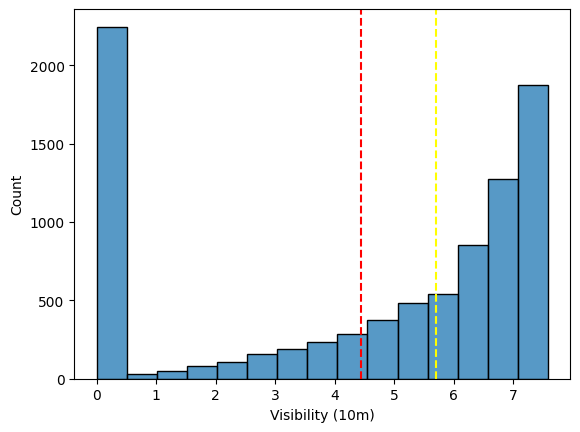

In [125]:
sns.histplot(np.log(np.max(df['Visibility (10m)']+1)-df['Visibility (10m)']))
plt.axvline(np.mean(np.log(np.max(df['Visibility (10m)']+1)-df['Visibility (10m)'])), color = 'red', linestyle = 'dashed')
plt.axvline(np.median(np.log(np.max(df['Visibility (10m)']+1)-df['Visibility (10m)'])), color = 'yellow', linestyle = 'dashed')


## Plotting all categorical columns

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

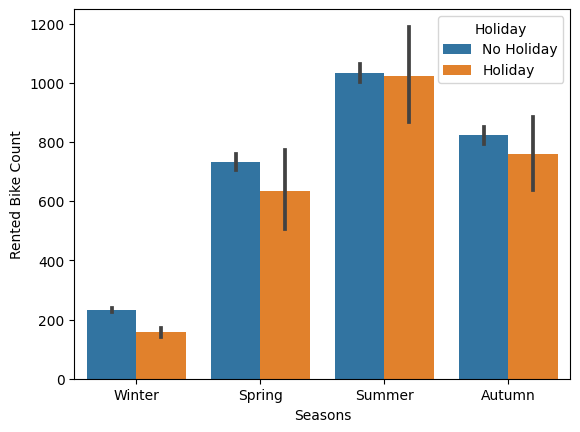

In [72]:
sns.barplot(x = df.Seasons, y = df['Rented Bike Count'], hue = df['Holiday'])

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

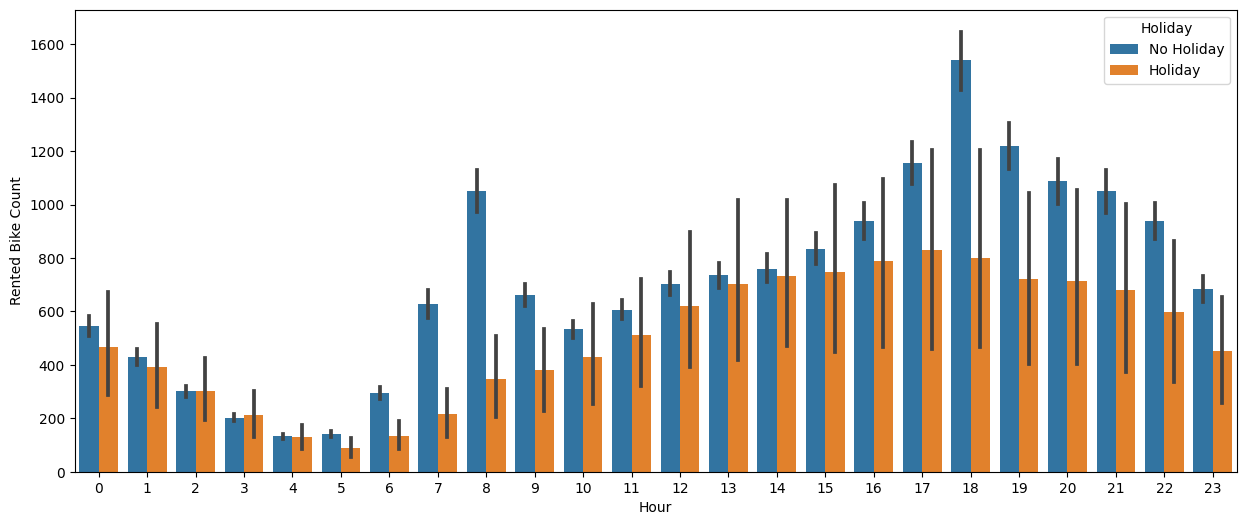

In [119]:
plt.figure(figsize=(15,6))
sns.barplot(x = df.Hour, y = df['Rented Bike Count'], hue = df['Holiday'])

<Axes: xlabel='year', ylabel='Rented Bike Count'>

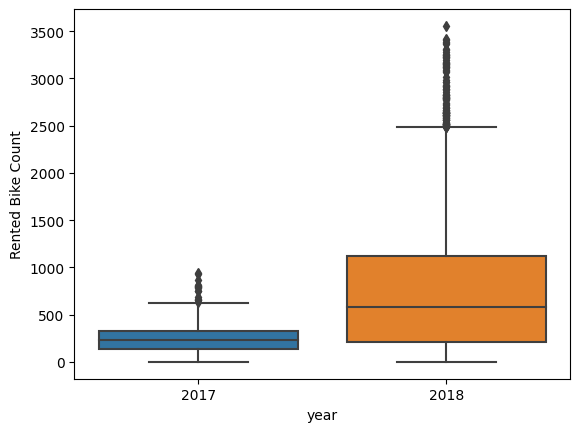

In [122]:
sns.boxplot(x = df.year, y = df['Rented Bike Count'])

In [69]:
df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

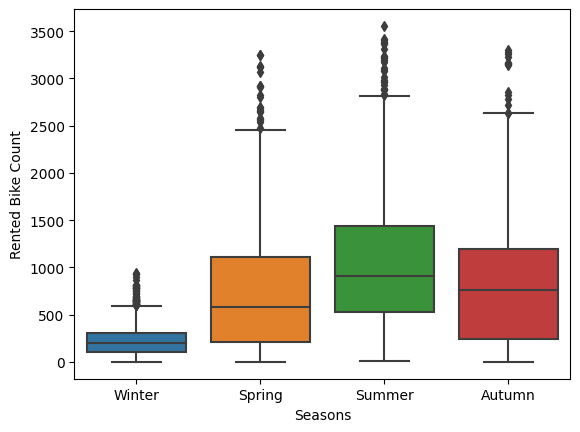

In [73]:
sns.boxplot(x = df.Seasons, y = df['Rented Bike Count'])

In [80]:
df.describe().columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

<Axes: >

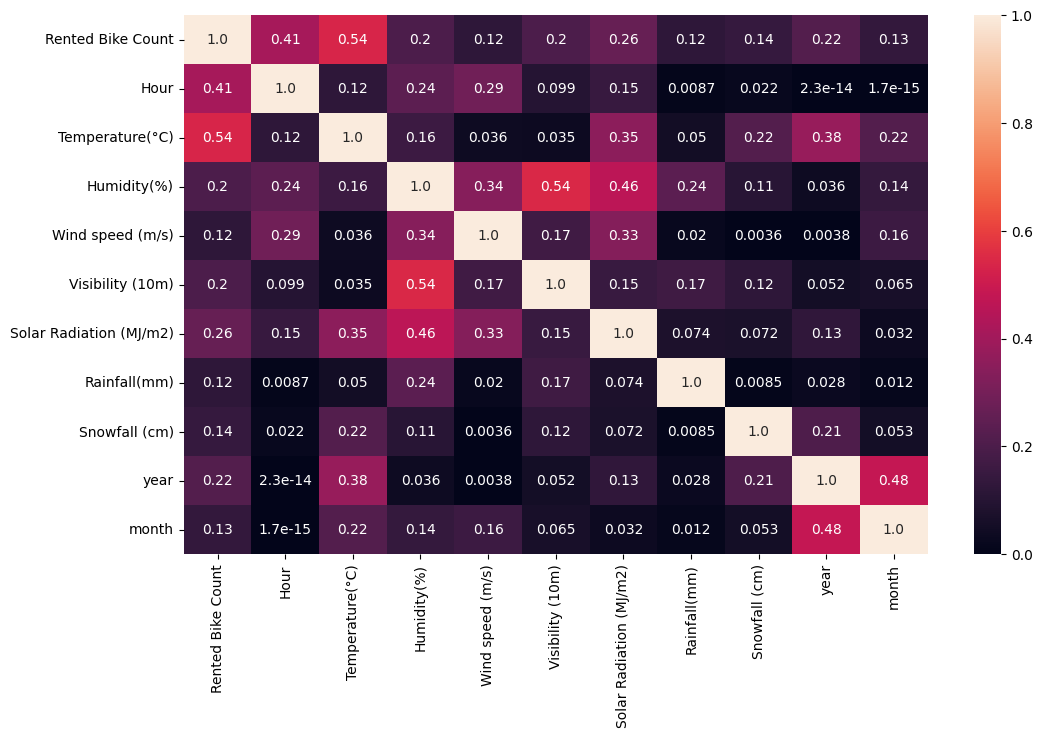

In [107]:
plt.figure(figsize=(12,7))
sns.heatmap(abs(df[[ 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year', 'month']].corr()), annot=True, fmt='.2')

In [106]:
df.drop(['Dew point temperature(°C)', 'Date'], axis = 1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11


In [93]:
df['year'] = df.Date.apply(lambda x: x.year)
df['month'] = df.Date.apply(lambda x: x.month)

In [109]:
df.year.value_counts()

year
2018    8016
2017     744
Name: count, dtype: int64

In [108]:
x = df[['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year', 'month', 'Hour']]
y = df[['Rented Bike Count']]

In [112]:
del x

In [113]:
del y